# Derin Öğrenmeye Giriş

**Derin Öğrenme Nedir?**

Derin Öğrenme, insan beyninin sinir ağlarından esinlenen yapay nöron katmanları kullanarak karmaşık veri desenlerini otomatik olarak öğrenen bir makine öğrenmini alt kümesidir. "Derin" terimi, verilerin işlenmesinden sorumlu çoklu (genellikle 3+) gizli katmanlara sahip nöral ağları ifade eder.


**Temel Fark:**

Geleneksel ML: İnsan mühendisliği özellikler (feature engineering) gerektirir.

Deep Learning: Ham veriden (pixel, ses dalgası vb.) doğrudan öğrenme yeteneğidir.



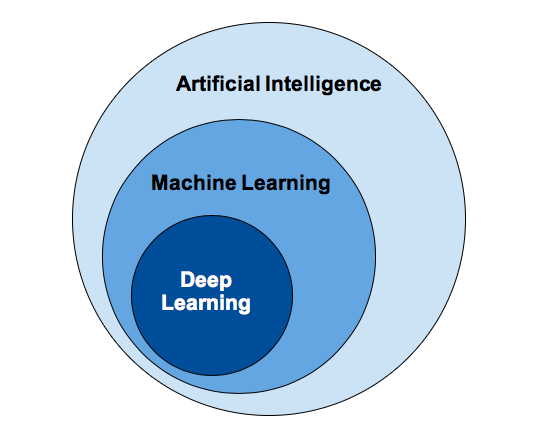

# Derin Öğrenme Tarihçesi
- 1943
Warren McCulloch & Walter Pitts: Biyolojik nöronların matematiksel modeli

- 1958
Frank Rosenblatt: Perceptron (ilk yapay nöron)

- 1980'ler
Backpropagation algoritmasının keşfi (gradient hesaplama)

- 2012
AlexNet CNN mimarisinin ImageNet yarışmasında %16 hata ile rekor kırması (önceki: %25)

- 2016
AlphaGo'nun Go dünya şampiyonunu yenmesi

- 2020'ler
Transformers mimarisi (ChatGPT, DALL-E) ile dil ve çoklu ortam devrimi



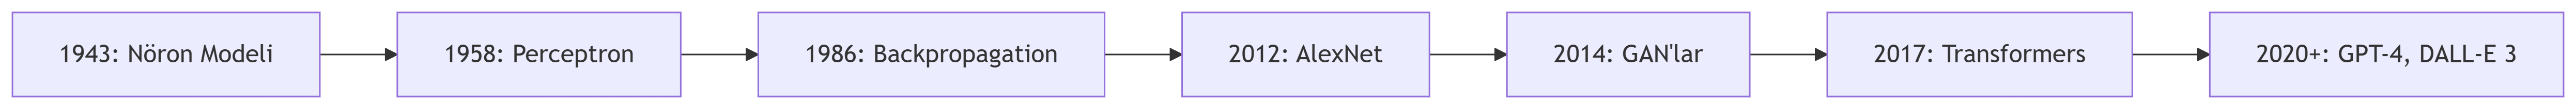

 **Derin öğrenme sihirli değnek değildir.**

Başarı için:

- Yüksek kaliteli büyük veri

- GPU altyapısı

- Hiperparametre optimizasyonu şarttır.

# Yapay Sinir Ağları - Artificial Neural Networks (ANN)

Biyolojik sinir ağlarından esinlenen, verilerden karmaşık desenler öğrenmek için tasarlanmış matematiksel hesaplama modelleridir. Temel birim olan "yapay nöron", insan beynindeki nöronların elektrokimyasal sinyal iletimini matematiksel fonksiyonlarla taklit eder.

Yapay sinir ağları, genel olarak üç ana katman halinde düzenlenir.

**Giriş Katmanı (Input Layer):** Bu katman, dış dünyadan gelen ham veriyi alır ve ağa aktarır. Giriş katmanındaki nöron sayısı, genellikle veri setindeki özellik sayısına eşittir.

**Gizli Katmanlar (Hidden Layers):** Giriş katmanından gelen veriler, bu katmanlarda işlenir. Bir ağda birden fazla gizli katman bulunabilir ve bu katmanların sayısı, derin öğrenmenin "derin" kavramını belirler. Her bir gizli katman, bir önceki katmandan gelen çıktıları alır, daha detaylı bir şekilde işler ve bir sonraki katmana aktarır. Gizli katmanların varlığı, ağın karmaşık ve doğrusal olmayan ilişkileri öğrenmesini sağlar.

**Çıkış Katmanı (Output Layer):** Ağın ürettiği nihai sonuç bu katmandan elde edilir. Çözülen probleme göre bu katmandaki nöron sayısı değişiklik gösterir. Örneğin, ikili bir sınıflandırma probleminde tek bir nöron yeterli olurken, çoklu sınıflandırma probleminde her sınıf için bir nöron bulunabilir.

In [ ]:
# Gerekli kütüphanelerin import edilmesi
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import torch
import torch.nn as nn
import torchvision
from torchvision import transforms
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# GPU kullanılabilirliğinin kontrolü
print("TensorFlow version:", tf.__version__)
print("PyTorch version:", torch.__version__)
print("GPU available:", tf.config.list_physical_devices('GPU'))

TensorFlow version: 2.19.0
PyTorch version: 2.8.0+cu126
GPU available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


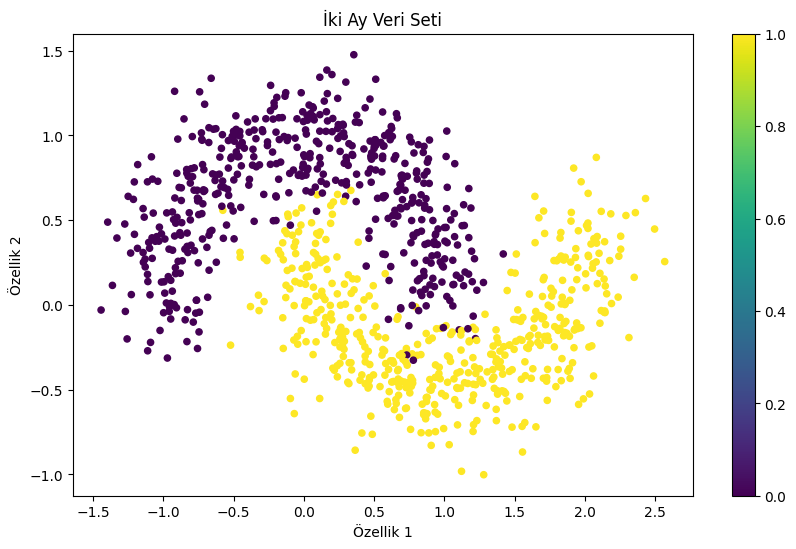

In [ ]:
# Basit bir veri seti yükleme ve görselleştirme
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=20)
plt.title('İki Ay Veri Seti')
plt.xlabel('Özellik 1')
plt.ylabel('Özellik 2')
plt.colorbar()
plt.show()

#  Parametreler ve Hiperparametreler
**Parametreler:** Modelin eğitim sırasında öğrendiği ağırlık ve bias değerleridir.

**Hiperparametreler:** Eğitimden önce belirlenen ve modelin yapısını kontrol eden değerlerdir (öğrenme oranı, batch boyutu, katman sayısı vb.).

**Ağırlıklar (Weights):** Ağırlıklar, bir nörona gelen her bir girdinin önemini belirleyen sayısal değerlerdir. Eğitim süreci boyunca, model bu ağırlıkları sürekli olarak günceller. Yüksek ağırlık değeri, o girdinin nöronun çıktısı üzerinde daha büyük bir etkiye sahip olduğu anlamına gelir.

**Sapma (Bias):** Sapma, nöronun ağırlıklı toplamına eklenen sabit bir değerdir. Aktivasyon fonksiyonunun çıktısını etkileyerek modelin doğruluğunu artırmaya yardımcı olur.



In [ ]:
# Hiperparametre optimizasyonu örneği
learning_rates = [0.001, 0.01, 0.1]
batch_sizes = [16, 32, 64]

results = {}

for lr in learning_rates:
    for batch_size in batch_sizes:
        # Modeli oluştur ve derle
        model = keras.Sequential([
            keras.layers.Dense(10, activation='relu', input_shape=(2,)),
            keras.layers.Dense(1, activation='sigmoid')
        ])

        model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr),
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

        # Modeli eğit
        history = model.fit(X, y, epochs=50, batch_size=batch_size, verbose=0, validation_split=0.2)

        # Sonuçları kaydet
        results[f'lr_{lr}_bs_{batch_size}'] = history.history['val_accuracy'][-1]

print("Hiperparametre sonuçları:")
for key, value in results.items():
    print(f"{key}: {value:.4f}")

Hiperparametre sonuçları:
lr_0.001_bs_16: 0.9000
lr_0.001_bs_32: 0.8800
lr_0.001_bs_64: 0.8450
lr_0.01_bs_16: 0.9650
lr_0.01_bs_32: 0.9750
lr_0.01_bs_64: 0.9700
lr_0.1_bs_16: 0.9800
lr_0.1_bs_32: 0.9400
lr_0.1_bs_64: 0.9600



# Aktivasyon Fonksiyonları

Aktivasyon fonksiyonları, nöronların çıktısını belirleyen ve modelin doğrusal olmayan ilişkileri öğrenmesini sağlayan fonksiyonlardır.

**Sigmoid Fonksiyonu:** En eski ve popüler fonksiyonlardan biridir. Çıktıyı $$ aralığına sıkıştırır ve olasılıksal bir sonuç sunar. Türevlenebilir olması öğrenme sürecini mümkün kılar. Ancak, uç noktalarda türevinin sıfıra yaklaşması Vanishing Gradient (kaybolan gradyan) sorununa yol açarak derin ağların eğitimini yavaşlatabilir veya durdurabilir.

**ReLU (Rectified Linear Unit) Fonksiyonu:** Günümüzde gizli katmanlarda en sık tercih edilen fonksiyondur. Negatif değerler için 0, pozitif değerler için ise kendisi olarak kalır. Bu yapısı sayesinde Vanishing Gradient sorunundan etkilenmez ve Sigmoid'e göre çok daha hızlı bir eğitim sağlar. Ancak, negatif değerlerde gradyanın 0 olması

**Softmax Fonksiyonu:** Çok sınıflı sınıflandırma problemlerinde çıktı katmanında kullanılır. Girdileri (logitleri) her bir sınıf için bir olasılık dağılımına dönüştürür. Bu, çıktıların toplamının 1 olmasını garanti eder.


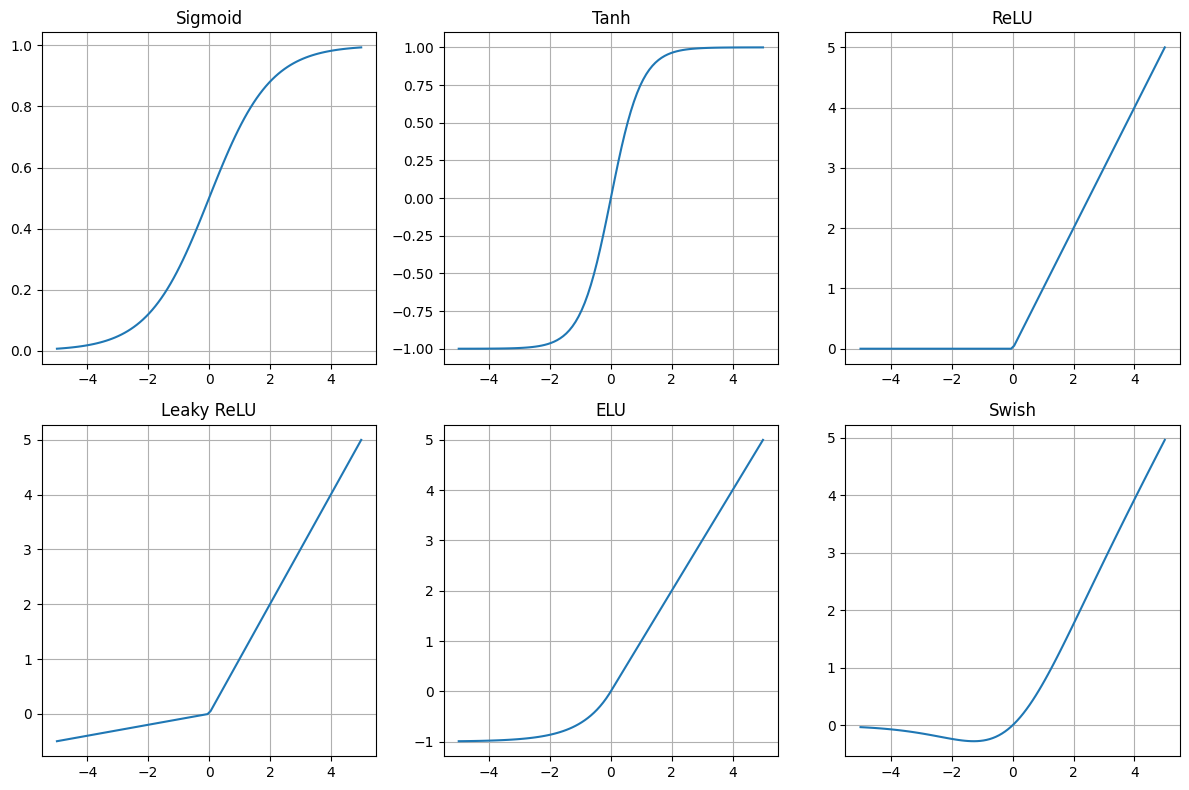

In [ ]:
# Farklı aktivasyon fonksiyonlarının görselleştirilmesi
x = np.linspace(-5, 5, 100)
activations = {
    'Sigmoid': tf.keras.activations.sigmoid(x),
    'Tanh': tf.keras.activations.tanh(x),
    'ReLU': tf.keras.activations.relu(x),
    'Leaky ReLU': tf.keras.layers.LeakyReLU(alpha=0.1)(x).numpy(),
    'ELU': tf.keras.activations.elu(x),
    'Swish': tf.keras.activations.swish(x)
}

plt.figure(figsize=(12, 8))
for i, (name, activation) in enumerate(activations.items(), 1):
    plt.subplot(2, 3, i)
    plt.plot(x, activation)
    plt.title(name)
    plt.grid(True)

plt.tight_layout()
plt.show()

# Kayıp (Loss) ve Maliyet (Cost) Fonksiyonları

Bir makine öğrenmesi modelinin başarısını ölçmek için öncelikle bir **kayıp fonksiyonu (loss function)** tanımlanır. Kayıp fonksiyonu, modelin tek bir örnek üzerindeki hatasını sayısal olarak ifade eder.

Örneğin, bir ev fiyatı tahmin modelinde belirli bir ev için tahmin edilen fiyat ile gerçek fiyat arasındaki farkın karesi o örnek için bir kayıp değeri olabilir. Kayıp ne kadar yüksekse, model o örnek için o kadar fazla hata yapmış demektir.

**Maliyet fonksiyonu (cost function)** ise tüm eğitim verisi üzerindeki ortalama hatayı ifade eder

Yani maliyet fonksiyonu, tüm veri setindeki kayıp fonksiyonlarının ortalamasıdır (veya bazen toplamıdır). Modelin eğitim sürecinde optimizasyon algoritmaları bu maliyet fonksiyonunu minimize etmeye çalışırlar. Özetle: Kayıp fonksiyonu tek bir örneğin hatasını ölçerken, maliyet fonksiyonu modelin genel performansını ölçer.

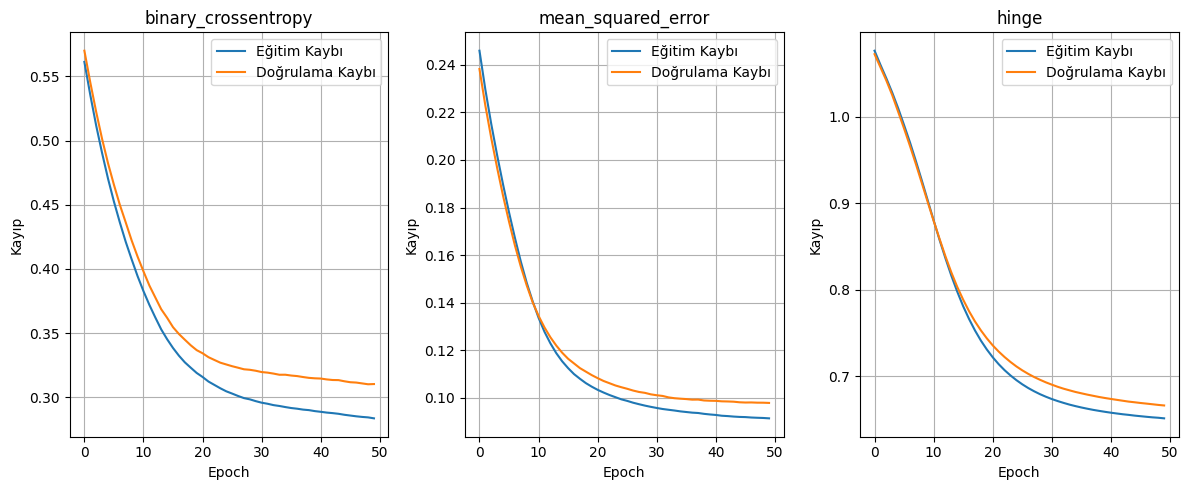

In [ ]:
# Farklı kayıp fonksiyonlarının karşılaştırılması
loss_functions = ['binary_crossentropy', 'mean_squared_error', 'hinge']

plt.figure(figsize=(12, 5))

for i, loss_func in enumerate(loss_functions, 1):
    model = keras.Sequential([
        keras.layers.Dense(10, activation='relu', input_shape=(2,)),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam',
                 loss=loss_func,
                 metrics=['accuracy'])

    history = model.fit(X, y, epochs=50, verbose=0, validation_split=0.2)

    plt.subplot(1, 3, i)
    plt.plot(history.history['loss'], label='Eğitim Kaybı')
    plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
    plt.title(loss_func)
    plt.xlabel('Epoch')
    plt.ylabel('Kayıp')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

# Optimizer Algoritmaları
**Optimizer algoritmaları**, kayıp fonksiyonu tarafından hesaplanan hata değerine göre modelin parametrelerini (ağırlıklar ve sapmalar) güncelleyerek kaybı en aza indirmeye çalışan algoritmalardır. Bu algoritmalar, modelin öğrenme sürecinde "nasıl" ilerleyeceğini belirler.

**Stokastik Gradyan İnişi (SGD):** En temel optimizasyon algoritmalarından biridir. Tüm parametre güncellemeleri için sabit bir öğrenme oranı kullanır. Bu yapısı nedeniyle, modelin yakınsaması yavaş olabilir veya kayıp fonksiyonunun optimal olmayan "vadilerinde" takılıp kalmasına neden olabilir.

**Adam (Adaptive Moment Estimation):** Günümüzde en popüler ve etkili optimizasyon algoritmalarından biridir. Adam, diğer algoritmaların aksine, her bir parametre için ayrı ve uyarlanabilir bir öğrenme oranı kullanarak daha hızlı ve daha etkili bir şekilde minimuma ulaşır. Adam, birinci ve ikinci dereceden moment (ortalama ve varyans) bilgilerini kullanarak daha bilinçli güncellemeler yapar. Bu, pratik uygulamalarda neden Adam'ın standart bir başlangıç noktası olarak tercih edildiğini açıklar.


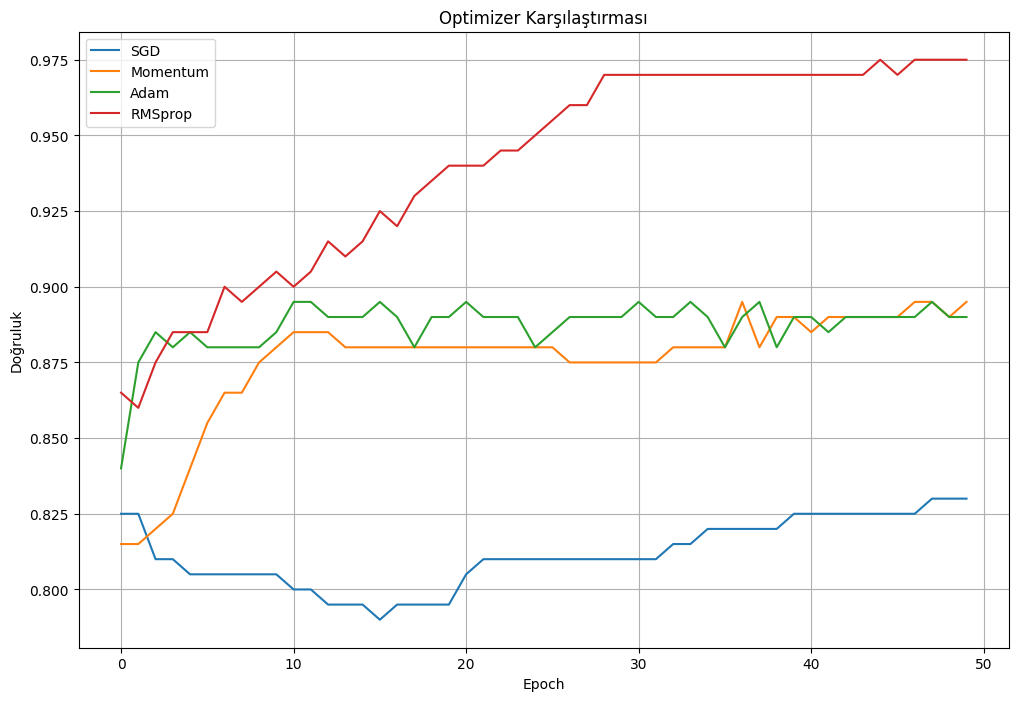

In [ ]:
# Farklı optimizerların performans karşılaştırması
optimizers = {
    'SGD': keras.optimizers.SGD(learning_rate=0.01),
    'Momentum': keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
    'Adam': keras.optimizers.Adam(learning_rate=0.01),
    'RMSprop': keras.optimizers.RMSprop(learning_rate=0.01)
}

plt.figure(figsize=(12, 8))

for opt_name, optimizer in optimizers.items():
    model = keras.Sequential([
        keras.layers.Dense(10, activation='relu', input_shape=(2,)),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=optimizer,
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

    history = model.fit(X, y, epochs=50, verbose=0, validation_split=0.2)

    plt.plot(history.history['val_accuracy'], label=opt_name)

plt.title('Optimizer Karşılaştırması')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()
plt.grid(True)
plt.show()

# Model Değerlendirme Metrikleri

Modelin eğitim sürecini yönlendirmek için kayıp fonksiyonları kullanılırken, eğitimin sonunda modelin gerçek dünya performansını değerlendirmek için değerlendirme metrikleri kullanılır. Bu metrikler, modelin ne kadar iyi tahminler yaptığını daha somut bir şekilde ölçmeye yarar.

**Yaygın Sınıflandırma Metrikleri**

**Doğruluk (Accuracy):** En yaygın kullanılan ve en basit metriktir. Doğru sınıflandırmaların toplam tahminlere oranı olarak hesaplanır.

**Hassasiyet (Precision):** Modelin pozitif olarak sınıflandırdığı örneklerin ne kadarının gerçekten pozitif olduğunu ölçer. Yanlış pozitiflerin maliyetli olduğu durumlarda (örneğin, spam filtreleme), yüksek hassasiyet kritik öneme sahiptir.

**Duyarlılık (Recall):** Gerçekte pozitif olan örneklerin ne kadarının model tarafından doğru bir şekilde pozitif olarak sınıflandırıldığını ölçer. Yanlış negatiflerin maliyetli olduğu durumlarda (örneğin, bir kanser teşhisi modelinde), yüksek duyarlılık daha önemlidir.

**F1-Skor:** Hassasiyet ve Duyarlılık değerlerinin harmonik ortalamasıdır. Bu metrik, iki değer arasında bir denge kurulması gerektiğinde veya dengesiz veri setlerinde daha güvenilir bir ölçüt sunar.

Test Kaybı: 0.3079
Test Doğruluğu: 1.0000
Test Kesinlik: 1.0000
Test Hassasiyet: 1.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


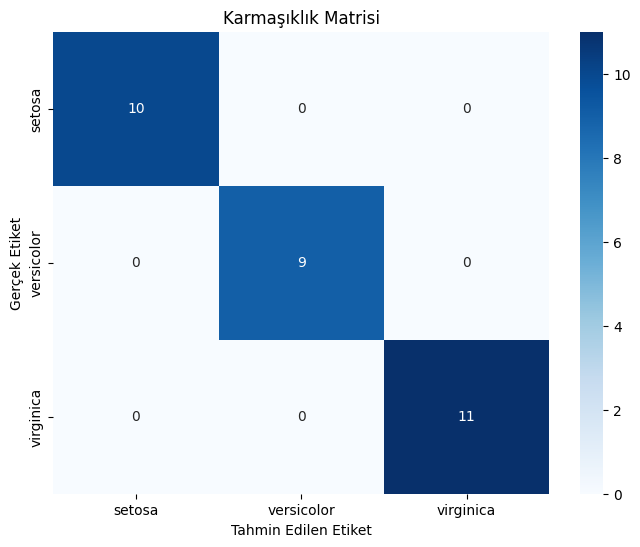

In [ ]:
# Sınıflandırma metrikleri örneği
from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelBinarizer

# Iris veri setini yükle
iris = load_iris()
X_iris, y_iris = iris.data, iris.target

# Çok sınıflı etiketleri ikili formata çevir
lb = LabelBinarizer()
y_iris_binary = lb.fit_transform(y_iris)

# Eğitim ve test verisi olarak ayır
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris_binary, test_size=0.2, random_state=42)

# Model oluştur
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(4,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy',
                       keras.metrics.Precision(name='precision'),
                       keras.metrics.Recall(name='recall')])

# Modeli eğit
history = model.fit(X_train, y_train, epochs=50, verbose=0, validation_split=0.2)

# Test setinde değerlendir
test_results = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Kaybı: {test_results[0]:.4f}")
print(f"Test Doğruluğu: {test_results[1]:.4f}")
print(f"Test Kesinlik: {test_results[2]:.4f}")
print(f"Test Hassasiyet: {test_results[3]:.4f}")

# Karmaşıklık matrisi
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_test_classes, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Karmaşıklık Matrisi')
plt.ylabel('Gerçek Etiket')
plt.xlabel('Tahmin Edilen Etiket')
plt.show()

# Popüler Derin Öğrenme Mimarileri

## **Evrişimsel Sinir Ağları (CNN)**
Evrişimsel sinir ağları, özellikle görüntü, video ve diğer görsel verilerin analiz edilmesinde kullanılan bir yapay sinir ağı türüdür. CNN'lerin temel yapı taşları, evrişim katmanı (convolutional layer) ve havuzlama katmanı (pooling layer) gibi özel katmanlardır.

**Evrişim Katmanı:** Bu katman, görüntü üzerinde hareket eden filtreler kullanarak yerel özellikleri (kenarlar, dokular, vb.) çıkarır.

**Havuzlama Katmanı:** Evrişim katmanından sonra gelen havuzlama katmanları, parametre sayısını azaltarak görüntünün boyutunu küçültürken, önemli bilgileri korur.

In [ ]:
# MNIST veri setini yükle
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Veriyi normalize et ve yeniden şekillendir
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# Etiketleri one-hot encoding yap
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# CNN modeli oluştur
cnn_model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

cnn_model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

cnn_model.summary()

# Modeli eğit
history_cnn = cnn_model.fit(X_train, y_train,
                           epochs=10,
                           batch_size=128,
                           validation_split=0.2,
                           verbose=1)

# Test setinde değerlendir
test_loss, test_acc = cnn_model.evaluate(X_test, y_test, verbose=0)
print(f"Test Doğruluğu: {test_acc:.4f}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.7324 - loss: 0.8329 - val_accuracy: 0.9750 - val_loss: 0.0869
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9574 - loss: 0.1451 - val_accuracy: 0.9821 - val_loss: 0.0604
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9722 - loss: 0.0954 - val_accuracy: 0.9849 - val_loss: 0.0495
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9786 - loss: 0.0747 - val_accuracy: 0.9883 - val_loss: 0.0399
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9826 - loss: 0.0604 - val_accuracy: 0.9884 - val_loss: 0.0406
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9857 - loss: 0.0503 - val_accuracy: 0.9886 - val_loss: 0.0453
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9856 - loss: 0.0483 - val_accuracy: 0.9890 - val_loss: 0.0435
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9886 - loss: 0.0402 - val_accuracy: 0.

## **Generative Adversarial Networks (GAN)**

Generative Adversarial Networks (GAN), gerçekçi veriler üretmek için birbiriyle rekabet eden iki sinir ağı mimarisinden oluşur.

**Üretici (Generator):** Bu ağ, rastgele gürültüden yeni ve gerçekçi veriler oluşturmaya çalışır.

**Ayırt Edici (Discriminator):** Bu ağ ise kendisine verilen verinin gerçek mi yoksa üretici tarafından mı oluşturulduğunu ayırt etmeye çalışır.

Bu iki ağ, bir tür "oyun teorisi" mekanizması içinde birbirlerini eğitir. Üretici, ayırt ediciyi kandıracak kadar iyi sahte veriler üretmeye çalışırken, ayırt edici de giderek daha iyi sahte verileri tanımayı öğrenir. GAN'lar, fotoğraf gerçekliğinde görüntüler oluşturma, video üretme ve stil transferi gibi alanlarda kullanılır.

In [ ]:
import torch.nn as nn

class Generator(nn.Module):
    def __init__(self, noise_dim=100):
        super(Generator, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(noise_dim, 128),
            nn.ReLU(True),
            nn.Linear(128, 784),  # 28x28 = 784 boyutunda çıktı
            nn.Tanh()             # piksel değerlerini [-1,1] aralığına çek
        )
    def forward(self, z):
        out = self.fc(z)
        return out  # çıktı 784 boyutlu düz vektör (görüntü piksel değerleri)

class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(784, 128),
            nn.ReLU(True),
            nn.Linear(128, 1),
            nn.Sigmoid()  # çıktı [0,1] arası gerçek olma olasılığı
        )
    def forward(self, x):
        out = self.fc(x)
        return out

# Ağları oluşturalım
G = Generator(noise_dim=100)
D = Discriminator()


In [ ]:
# Basit bir GAN örneği
class GAN:
    def __init__(self, latent_dim=100):
        self.latent_dim = latent_dim

        # Üretici model
        self.generator = self.build_generator()

        # Ayrıştırıcı model
        self.discriminator = self.build_discriminator()

        # Birleşik model (GAN)
        self.discriminator.compile(optimizer='adam',
                                  loss='binary_crossentropy',
                                  metrics=['accuracy'])
        self.discriminator.trainable = False

        z = keras.layers.Input(shape=(self.latent_dim,))
        generated_image = self.generator(z)
        validity = self.discriminator(generated_image)

        self.combined = keras.Model(z, validity)
        self.combined.compile(optimizer='adam', loss='binary_crossentropy')

    def build_generator(self):
        model = keras.Sequential([
            keras.layers.Dense(256, input_dim=self.latent_dim),
            keras.layers.LeakyReLU(alpha=0.2),
            keras.layers.BatchNormalization(momentum=0.8),
            keras.layers.Dense(512),
            keras.layers.LeakyReLU(alpha=0.2),
            keras.layers.BatchNormalization(momentum=0.8),
            keras.layers.Dense(1024),
            keras.layers.LeakyReLU(alpha=0.2),
            keras.layers.BatchNormalization(momentum=0.8),
            keras.layers.Dense(784, activation='tanh'),
            keras.layers.Reshape((28, 28, 1))
        ])
        return model

    def build_discriminator(self):
        model = keras.Sequential([
            keras.layers.Flatten(input_shape=(28, 28, 1)),
            keras.layers.Dense(512),
            keras.layers.LeakyReLU(alpha=0.2),
            keras.layers.Dense(256),
            keras.layers.LeakyReLU(alpha=0.2),
            keras.layers.Dense(1, activation='sigmoid')
        ])
        return model

    def train(self, X_train, epochs=10000, batch_size=128, sample_interval=1000):
        # Etiketler
        valid = np.ones((batch_size, 1))
        fake = np.zeros((batch_size, 1))

        for epoch in range(epochs):
            # Gerçek görüntüleri seç
            idx = np.random.randint(0, X_train.shape[0], batch_size)
            real_imgs = X_train[idx]

            # Gürültü üret
            noise = np.random.normal(0, 1, (batch_size, self.latent_dim))

            # Sahte görüntüler üret
            gen_imgs = self.generator.predict(noise)

            # Ayrıştırıcıyı eğit
            d_loss_real = self.discriminator.train_on_batch(real_imgs, valid)
            d_loss_fake = self.discriminator.train_on_batch(gen_imgs, fake)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

            # Üreticiyi eğit
            noise = np.random.normal(0, 1, (batch_size, self.latent_dim))
            g_loss = self.combined.train_on_batch(noise, valid)

            # İlerlemeyi yazdır
            if epoch % sample_interval == 0:
                print(f"{epoch} [D loss: {d_loss[0]:.4f}, acc.: {100*d_loss[1]:.2f}%] [G loss: {g_loss:.4f}]")
                self.sample_images(epoch)

    def sample_images(self, epoch):
        r, c = 5, 5
        noise = np.random.normal(0, 1, (r * c, self.latent_dim))
        gen_imgs = self.generator.predict(noise)

        # Resimleri 0-1 aralığına getir
        gen_imgs = 0.5 * gen_imgs + 0.5

        fig, axs = plt.subplots(r, c)
        cnt = 0
        for i in range(r):
            for j in range(c):
                axs[i,j].imshow(gen_imgs[cnt, :,:,0], cmap='gray')
                axs[i,j].axis('off')
                cnt += 1
        fig.savefig(f"mnist_{epoch}.png")
        plt.close()

# GAN'ı eğitmek çok uzun sürüyor
# gan = GAN()
# gan.train(X_train, epochs=30000, batch_size=32, sample_interval=2000)

## **Transformer Mimarisi**
Transformer, özellikle doğal dil işleme (NLP) alanında devrim yaratan, tamamen dikkat mekanizmasına (attention) dayanan bir mimaridir. Geleneksel olarak kullanılan tekrarlayan sinir ağlarının (RNN) aksine, bir dizideki tüm kelimelerin birbirleriyle olan ilişkisini eş zamanlı olarak değerlendirir. Bu, modelin uzun dizilerdeki bağlamı daha etkili bir şekilde anlamasını sağlar. Bu mekanizma, bir kelimenin anlamının cümledeki diğer kelimeler tarafından nasıl etkilendiğini belirleyerek daha zengin bir temsil oluşturur.


In [ ]:
# 2 katmanlı küçük bir Transformer (sadece gösterim amaçlı)
model = nn.Transformer(d_model=64, nhead=4, num_encoder_layers=2, num_decoder_layers=2)

# Örnek giriş: 10 kelimeden oluşan bir cümleyi, 64 boyutlu gömlemelerle temsil edelim
# Transformer modülü beklediği şekilde: (seq_len, batch_size, embedding_dim)
src = torch.rand((10, 32, 64))  # 10 kaynak token, 32 batch, 64 boyut
tgt = torch.rand((5, 32, 64))   # 5 hedef token (mesela çeviri cümlesi 5 kelime)
out = model(src, tgt)
print(out.shape)  # (5, 32, 64) boyutunda çıktı bekleriz (5 hedef token için tahminler)

torch.Size([5, 32, 64])



## **Vision Transformers (ViT)**
Vision Transformer (ViT), Transformer mimarisinin görüntü işleme için uyarlanmış halidir. CNN'lerin aksine, ViT'ler görüntüleri küçük ve sabit boyutlu parçalara (patch) böler ve bu parçaları bir dizi olarak ele alarak Transformer modeline girdi olarak verir. Model, bu yamalar arasındaki küresel ilişkileri öz dikkat mekanizmasıyla öğrenir.[bağlantı metni](https://)

In [ ]:
import torchvision.models as models
# Öntanımlı bir Vision Transformer modeli (PyTorch 1.12+ ile)
vit_model = models.vit_b_16(pretrained=True)
vit_model.eval()

# Bir görüntüyü modelin beklediği boyuta getirip tahmin yapalım
from PIL import Image
from torchvision import transforms
img = Image.open("vit.jpg")
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))
])
x = transform(img).unsqueeze(0)  # modeli beslemek için batch boyutu ekle
with torch.no_grad():
    out = vit_model(x)
    pred = out.argmax(dim=1).item()
print("Tahmin edilen sınıf:", pred)


Tahmin edilen sınıf: 332


In [ ]:
# Vision Transformer (ViT) için temel bileşenler
class PatchExtractor(keras.layers.Layer):
    def __init__(self, patch_size):
        super().__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID"
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches

class PatchEncoder(keras.layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super().__init__()
        self.num_patches = num_patches
        self.projection = keras.layers.Dense(units=projection_dim)
        self.position_embedding = keras.layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded

# Multi-Head Attention mekanizması
def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = keras.layers.Dense(units, activation=tf.nn.gelu)(x)
        x = keras.layers.Dropout(dropout_rate)(x)
    return x

# Transformer bloğu
def transformer_encoder(inputs, num_heads, key_dim, ff_dim, dropout=0.1):
    # Çok kafalı dikkat
    x = keras.layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = keras.layers.MultiHeadAttention(
        num_heads=num_heads, key_dim=key_dim, dropout=dropout
    )(x, x)
    x = keras.layers.Add()([x, inputs])

    # İleri beslemeli ağ
    y = keras.layers.LayerNormalization(epsilon=1e-6)(x)
    y = mlp(y, hidden_units=[ff_dim, inputs.shape[-1]], dropout_rate=dropout)

    return keras.layers.Add()([y, x])

# Vision Transformer modeli
def create_vit_classifier(input_shape, patch_size, num_patches, projection_dim,
                         transformer_layers, num_heads, key_dim, ff_dim,
                         mlp_units, num_classes, dropout=0.1):
    inputs = keras.layers.Input(shape=input_shape)

    # Görüntüyü yamalara böl
    patches = PatchExtractor(patch_size)(inputs)

    # Yamaları kodla
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

    # Transformer bloklarını oluştur
    x = encoded_patches
    for _ in range(transformer_layers):
        x = transformer_encoder(x, num_heads, key_dim, ff_dim, dropout)

    # Sınıflandırma başı
    representation = keras.layers.LayerNormalization(epsilon=1e-6)(x)
    representation = keras.layers.Flatten()(representation)
    representation = keras.layers.Dropout(dropout)(representation)

    # MLP başı
    features = mlp(representation, hidden_units=mlp_units, dropout_rate=dropout)

    # Çıktı
    logits = keras.layers.Dense(num_classes)(features)

    return keras.Model(inputs=inputs, outputs=logits)

# CIFAR-10 veri seti ile ViT denemesi
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

# Veriyi normalize et
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Hiperparametreler
input_shape = (32, 32, 3)
patch_size = 4
num_patches = (32 // patch_size) ** 2
projection_dim = 64
transformer_layers = 4
num_heads = 4
key_dim = projection_dim // num_heads
ff_dim = 128
mlp_units = [256]
num_classes = 10
dropout = 0.1

# Modeli oluştur
vit_model = create_vit_classifier(
    input_shape, patch_size, num_patches, projection_dim,
    transformer_layers, num_heads, key_dim, ff_dim,
    mlp_units, num_classes, dropout
)

vit_model.compile(
    optimizer='adam',
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

vit_model.summary()

# Modeli eğitimi
history_vit = vit_model.fit(
    X_train, y_train,
    batch_size=128,
    epochs=10,
    validation_split=0.2,
    verbose=1
)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ patch_extractor     │ (None, None, 48)  │          0 │ input_layer[0][0] │
│ (PatchExtractor)    │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ patch_encoder       │ (None, 64, 64)    │      7,232 │ patch_extractor[… │
│ (PatchEncoder)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalization │ (None, 64, 64)    │        128 │ patch_encoder[0]… │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 64, 64)    │     16,640 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 64, 64)    │          0 │ multi_head_atten… │
│                     │                   │            │ patch_encoder[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 64, 64)    │        128 │ add[0][0]         │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 64, 128)   │      8,320 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 64, 128)   │          0 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 64, 64)    │      8,256 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 64, 64)    │          0 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 64, 64)    │          0 │ dropout_2[0][0],  │
│                     │                   │            │ add[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 64, 64)    │        128 │ add_1[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 64, 64)    │     16,640 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_2 (Add)         │ (None, 64, 64)    │          0 │ multi_head_atten… │
│                     │                   │            │ add_1[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 64, 64)    │        128 │ add_2[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 64, 128)   │      8,320 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_4 (Dropout) │ (None, 64, 128)   │          0 │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 64, 64)    │      8,256 │ dropout_4[0][0] 

 Total params: 1,192,650 (4.55 MB)

 Trainable params: 1,192,650 (4.55 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 51s 83ms/step - accuracy: 0.2508 - loss: 2.2400 - val_accuracy: 0.4456 - val_loss: 1.5557
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.4614 - loss: 1.4874 - val_accuracy: 0.5304 - val_loss: 1.3060
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.5381 - loss: 1.2806 - val_accuracy: 0.5773 - val_loss: 1.1895
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.5895 - loss: 1.1510 - val_accuracy: 0.6054 - val_loss: 1.1101
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.6311 - loss: 1.0381 - val_accuracy: 0.6072 - val_loss: 1.1231
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.6671 - loss: 0.9327 - val_accuracy: 0.6333 - val_loss: 1.0566
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.7005 - loss: 0.8394 - val_accuracy: 0.6315 - val_loss: 1.0665
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.7327 - loss: 0.7562 - val_a

# **Baştan Sona CIFAR-10 Üzerinde Derin Öğrenme Projesi**

In [ ]:
# Gerekli kütüphaneleri içe aktaralım
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import time
import warnings
warnings.filterwarnings('ignore')

# GPU kullanılabilirliğini kontrol edelim
print("TensorFlow sürümü:", tf.__version__)
print("GPU kullanılabilir mi?", "Evet" if tf.config.list_physical_devices('GPU') else "Hayır")

TensorFlow sürümü: 2.19.0
GPU kullanılabilir mi? Evet


### **1. Veri Setini Yükleme ve Keşfetme**

Eğitim verisi şekli: (50000, 32, 32, 3)
Test verisi şekli: (10000, 32, 32, 3)
Sınıf sayısı: 10


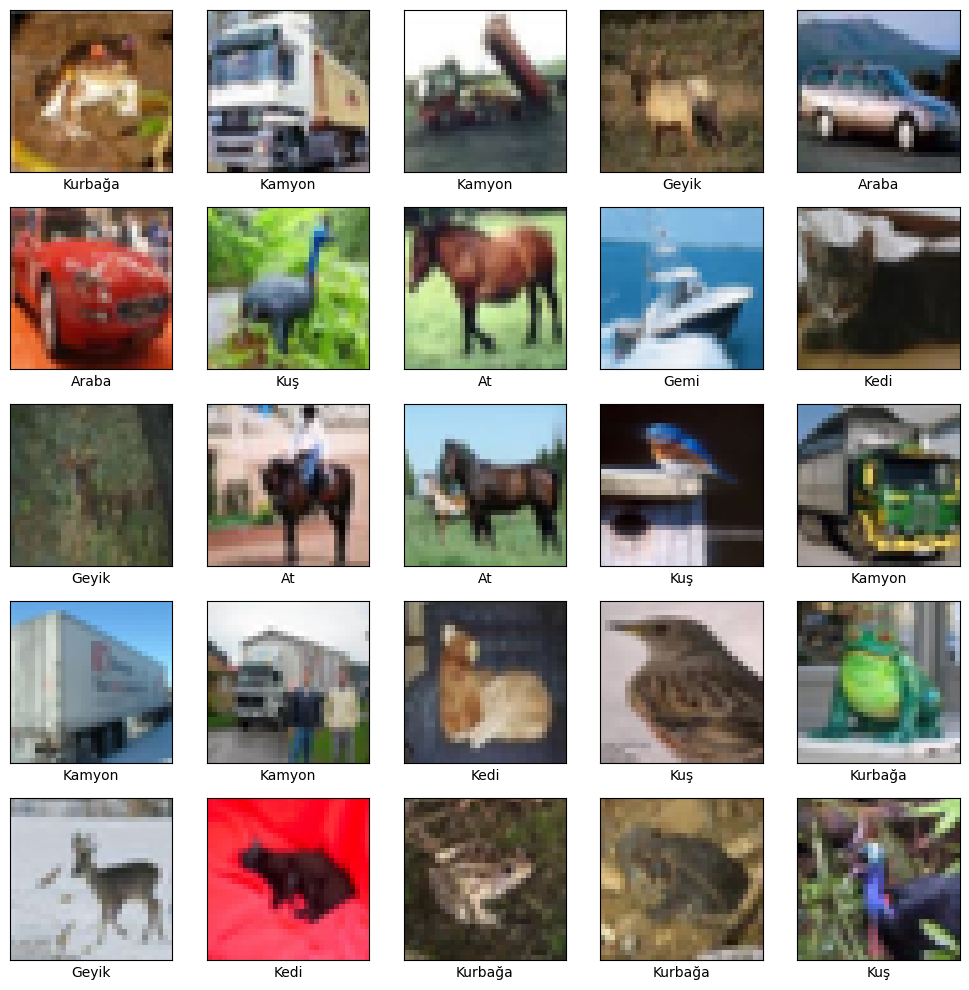

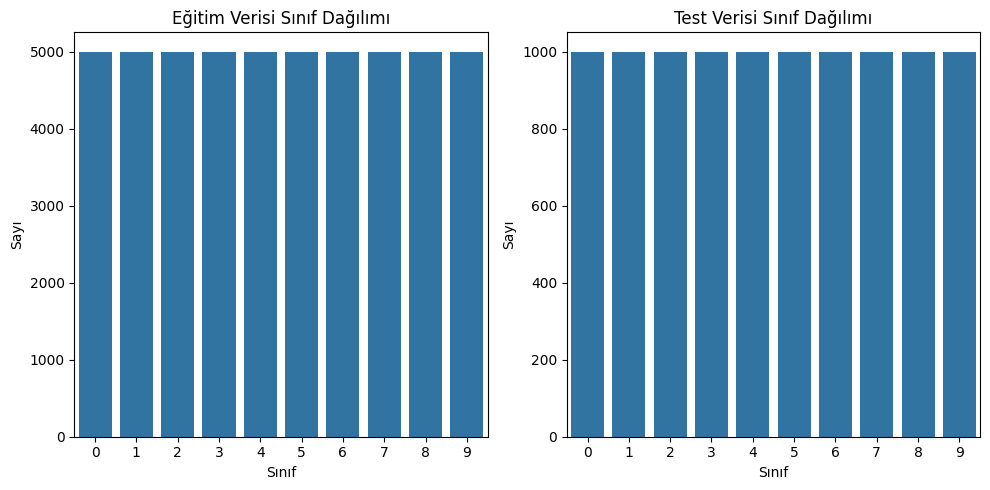

In [ ]:
# CIFAR-10 veri setini yükleyelim
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

# Veri seti hakkında bilgi edinelim
print("Eğitim verisi şekli:", X_train.shape)
print("Test verisi şekli:", X_test.shape)
print("Sınıf sayısı:", len(np.unique(y_train)))

# Sınıf isimlerini tanımlayalım
class_names = ['Uçak', 'Araba', 'Kuş', 'Kedi', 'Geyik',
               'Köpek', 'Kurbağa', 'At', 'Gemi', 'Kamyon']

# İlk 25 görüntüyü görselleştirelim
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.xlabel(class_names[y_train[i][0]])
plt.tight_layout()
plt.show()

# Sınıf dağılımını inceleyelim
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.countplot(x=y_train.flatten())
plt.title('Eğitim Verisi Sınıf Dağılımı')
plt.xlabel('Sınıf')
plt.ylabel('Sayı')

plt.subplot(1, 2, 2)
sns.countplot(x=y_test.flatten())
plt.title('Test Verisi Sınıf Dağılımı')
plt.xlabel('Sınıf')
plt.ylabel('Sayı')
plt.tight_layout()
plt.show()

### **2. Veri Ön İşleme**

Görüntüleri normalize ederek ve veri artırma teknikleri uygulayarak model performansını iyileştirelim.




In [ ]:
# Veriyi normalize edelim (0-255 arası değerleri 0-1 arasına dönüştürelim)
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Etiketleri one-hot encoding formatına dönüştürelim
y_train_categorical = keras.utils.to_categorical(y_train, 10)
y_test_categorical = keras.utils.to_categorical(y_test, 10)

# Veri artırma için ImageDataGenerator kullanalım
datagen = keras.preprocessing.image.ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1
)

# Veri artırma işlemini eğitim verisine uygulayalım
datagen.fit(X_train)

# Normalizasyon ve one-hot encoding sonrası veri boyutlarını kontrol edelim
print("Normalize edilmiş eğitim verisi şekli:", X_train.shape)
print("One-hot encoded eğitim etiketleri şekli:", y_train_categorical.shape)

Normalize edilmiş eğitim verisi şekli: (50000, 32, 32, 3)
One-hot encoded eğitim etiketleri şekli: (50000, 10)


Normalizasyon: Piksel değerlerini 0-255 aralığından 0-1 aralığına ölçeklendirerek modelin daha hızlı ve daha iyi öğrenmesini sağlarız.

One-hot encoding: Kategorik etiketleri ikili matris formatına dönüştürürüz. Örneğin, "3" sınıfı [0, 0, 0, 1, 0, 0, 0, 0, 0, 0] olarak kodlanır.

Veri artırma: Modelin daha iyi genelleme yapabilmesi için orijinal veri setine küçük deformasyonlar uygulayarak yeni örnekler oluştururuz.

### **3. Temel CNN Modeli Oluşturma**


In [ ]:
# Temel CNN modeli
def create_cnn_model():
    model = keras.Sequential([
        # İlk evrişim bloğu
        layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
        layers.BatchNormalization(),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.2),

        # İkinci evrişim bloğu
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.3),

        # Üçüncü evrişim bloğu
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.4),

        # Sınıflandırıcı
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    return model

# Modeli oluşturalım
cnn_model = create_cnn_model()

# Model özetini görüntüleyelim
cnn_model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 551,978 (2.11 MB)

 Trainable params: 551,274 (2.10 MB)

 Non-trainable params: 704 (2.75 KB)

**Conv2D**: Evrişim katmanları, görüntülerdeki özellikleri (kenarlar, dokular, desenler) çıkarır.

**BatchNormalization:** Ağdaki aktivasyon dağılımını stabilize ederek eğitimi hızlandırır ve daha iyi sonuçlar alınmasını sağlar.

**MaxPooling:** Öznitelik haritalarının boyutunu küçülterek hesaplama yükünü azaltır ve önemli özellikleri korur.

**ropout:** Aşırı öğrenmeyi (overfitting) önlemek için rastgele nöronları devre dışı bırakır.

**Dense:** Tam bağlı katmanlar, özellikleri birleştirerek sınıflandırma yapar.

### **4. Modeli Derleme ve Eğitme**

Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 51s 50ms/step - accuracy: 0.2966 - loss: 2.1366 - val_accuracy: 0.4903 - val_loss: 1.4151 - learning_rate: 0.0010
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.5158 - loss: 1.3426 - val_accuracy: 0.5819 - val_loss: 1.1896 - learning_rate: 0.0010
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 39ms/step - accuracy: 0.5940 - loss: 1.1460 - val_accuracy: 0.4969 - val_loss: 1.5749 - learning_rate: 0.0010
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - accuracy: 0.6398 - loss: 1.0250 - val_accuracy: 0.6322 - val_loss: 1.0852 - learning_rate: 0.0010
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 39ms/step - accuracy: 0.6721 - loss: 0.9406 - val_accuracy: 0.6798 - val_loss: 0.9585 - learning_rate: 0.0010
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 39ms/step - accuracy: 0.6944 - loss: 0.8828 - val_accuracy: 0.6657 - val_loss: 1.0209 - learning_rate: 0.0010
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.7150 - l

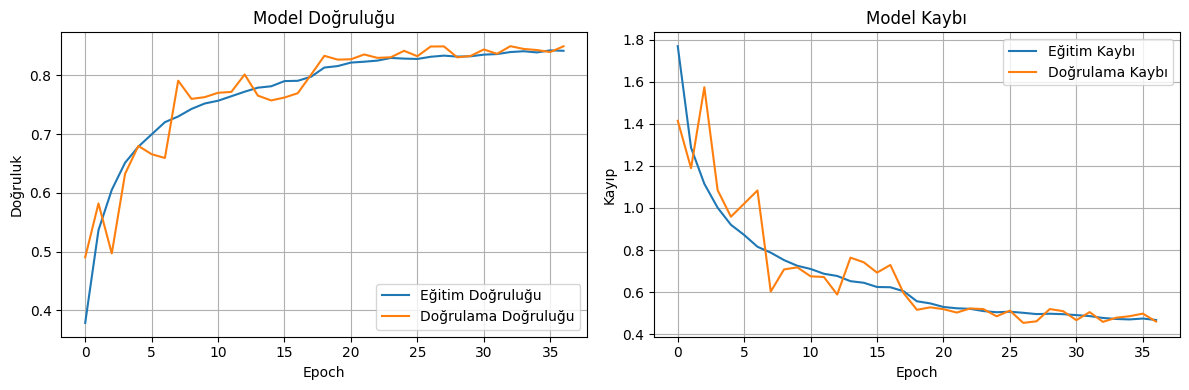

In [ ]:
# Modeli derleyelim
cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Callback'leri tanımlayalım (erken durdurma ve öğrenme oranı ayarlama)
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

reduce_lr = keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    min_lr=0.0001
)

# Modeli eğitelim
start_time = time.time()

history = cnn_model.fit(datagen.flow(X_train, y_train_categorical, batch_size=64),
                        epochs=50,
                        validation_data=(X_test, y_test_categorical),
                        callbacks=[early_stopping, reduce_lr],
                        verbose=1)

training_time = time.time() - start_time
print(f"Eğitim süresi: {training_time:.2f} saniye")

# Eğitim ve doğrulama kaybı/doğruluğunu görselleştirelim
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.title('Model Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.title('Model Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

**Optimizer:** Adam, adaptif öğrenme oranı ile etkili bir optimizasyon algoritmasıdır.

**Loss:** Kategorik çapraz entropi, çok sınıflı sınıflandırma problemleri için uygundur.

**EarlyStopping:** Doğrulama kaybı iyileşmediğinde eğitimi erken durdurur.

**ReduceLROnPlateau:** Doğrulama kaybı iyileşmediğinde öğrenme oranını azaltır.

### **5. Model Değerlendirme**


Test Kaybı: 0.4530
Test Doğruluğu: 0.8489
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step

Sınıflandırma Raporu:
              precision    recall  f1-score   support

        Uçak       0.85      0.88      0.86      1000
       Araba       0.93      0.94      0.93      1000
         Kuş       0.85      0.75      0.80      1000
        Kedi       0.77      0.67      0.72      1000
       Geyik       0.85      0.82      0.83      1000
       Köpek       0.84      0.72      0.78      1000
     Kurbağa       0.74      0.96      0.84      1000
          At       0.91      0.87      0.89      1000
        Gemi       0.90      0.93      0.91      1000
      Kamyon       0.86      0.95      0.90      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



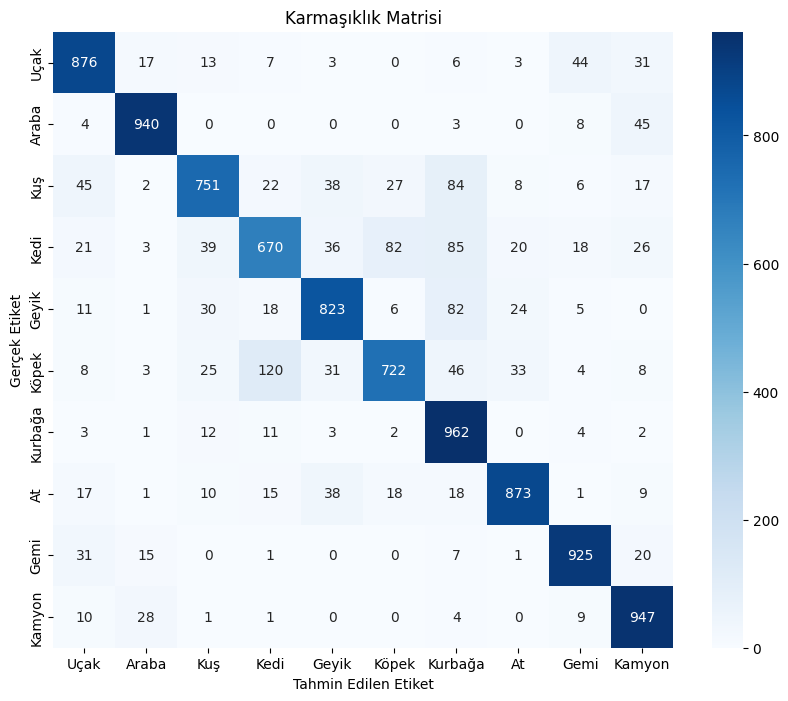

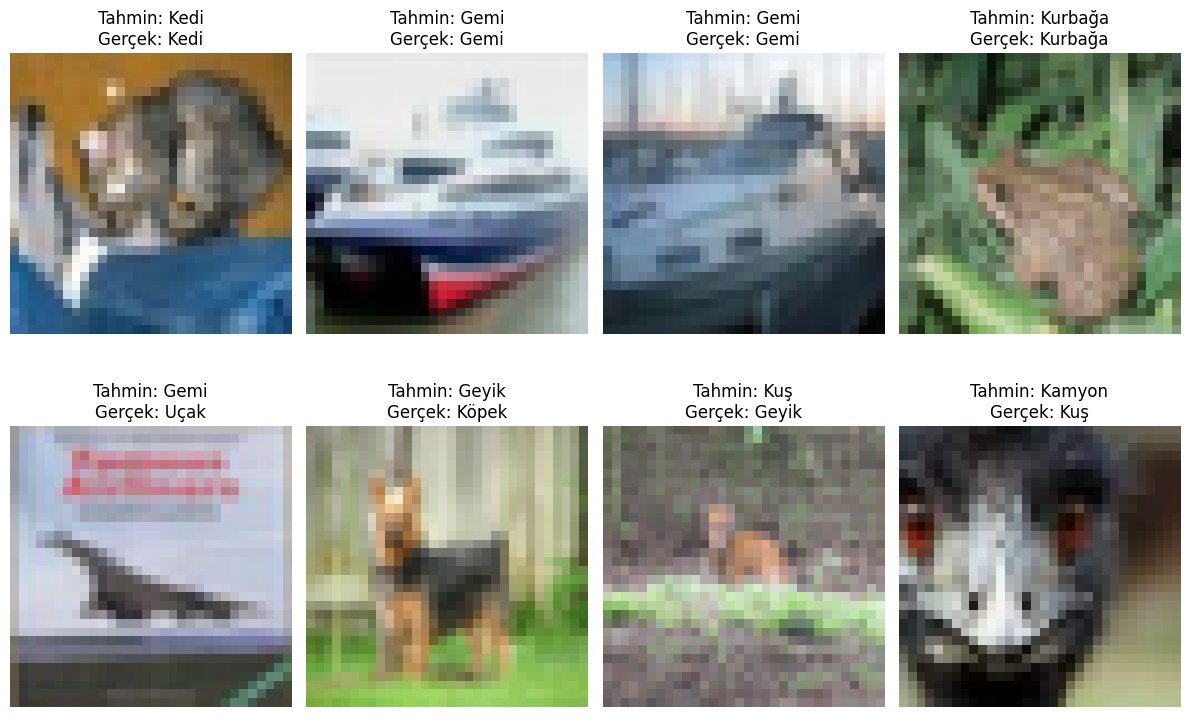

In [ ]:
# Test seti üzerinde modeli değerlendirelim
test_loss, test_accuracy = cnn_model.evaluate(X_test, y_test_categorical, verbose=0)
print(f"Test Kaybı: {test_loss:.4f}")
print(f"Test Doğruluğu: {test_accuracy:.4f}")

# Tahminlerde bulunalım
y_pred = cnn_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_categorical, axis=1)

# Sınıflandırma raporu
print("\nSınıflandırma Raporu:")
print(classification_report(y_true, y_pred_classes, target_names=class_names))

# Karmaşıklık matrisi
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Karmaşıklık Matrisi')
plt.ylabel('Gerçek Etiket')
plt.xlabel('Tahmin Edilen Etiket')
plt.show()

# Bazı doğru ve yanlış tahmin örneklerini görselleştirelim
correct_indices = np.where(y_pred_classes == y_true)[0]
incorrect_indices = np.where(y_pred_classes != y_true)[0]

plt.figure(figsize=(12, 8))

# Doğru tahmin örnekleri
for i, correct in enumerate(correct_indices[:4]):
    plt.subplot(2, 4, i+1)
    plt.imshow(X_test[correct])
    plt.title(f"Tahmin: {class_names[y_pred_classes[correct]]}\nGerçek: {class_names[y_true[correct]]}")
    plt.axis('off')

# Yanlış tahmin örnekleri
for i, incorrect in enumerate(incorrect_indices[:4]):
    plt.subplot(2, 4, i+5)
    plt.imshow(X_test[incorrect])
    plt.title(f"Tahmin: {class_names[y_pred_classes[incorrect]]}\nGerçek: {class_names[y_true[incorrect]]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

### **6. Transfer Learning**

Önceden eğitilmiş bir model kullanarak transfer learning uygulayalım.


In [ ]:
# Önceden eğitilmiş VGG16 modelini kullanalım
base_model = keras.applications.VGG16(weights='imagenet',
                                     include_top=False,
                                     input_shape=(32, 32, 3))

# Temel modelin katmanlarını donduralım (eğitimlerini engelleyelim)
for layer in base_model.layers:
    layer.trainable = False

# Yeni bir model oluşturalım
transfer_model = keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Modeli derleyelim
transfer_model.compile(optimizer='adam',
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

transfer_model.summary()

# Modeli eğitelim
history_transfer = transfer_model.fit(datagen.flow(X_train, y_train_categorical, batch_size=64),
                                     epochs=20,
                                     validation_data=(X_test, y_test_categorical),
                                     verbose=1)

# Transfer learning modelini değerlendirelim
test_loss_transfer, test_accuracy_transfer = transfer_model.evaluate(X_test, y_test_categorical, verbose=0)
print(f"Transfer Learning Test Doğruluğu: {test_accuracy_transfer:.4f}")

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 1, 1, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,586 (56.64 MB)

 Trainable params: 133,898 (523.04 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 54s 62ms/step - accuracy: 0.3599 - loss: 1.8063 - val_accuracy: 0.5325 - val_loss: 1.3313
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 71s 52ms/step - accuracy: 0.4954 - loss: 1.4404 - val_accuracy: 0.5600 - val_loss: 1.2511
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step - accuracy: 0.5130 - loss: 1.3813 - val_accuracy: 0.5713 - val_loss: 1.2218
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step - accuracy: 0.5259 - loss: 1.3523 - val_accuracy: 0.5738 - val_loss: 1.2103
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.5274 - loss: 1.3435 - val_accuracy: 0.5790 - val_loss: 1.1987
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.5420 - loss: 1.3087 - val_accuracy: 0.5794 - val_loss: 1.1944
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 44ms/step - accuracy: 0.5436 - loss: 1.2959 - val_accuracy: 0.5862 - val_loss: 1.1790
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.5485 - loss: 1.2849 - 

**Transfer Learning:** Büyük bir veri setinde (ImageNet) önceden eğitilmiş bir modeli alıp, kendi problemimize uyarlarız.

**VGG16:** Oxford Üniversitesi tarafından geliştirilen 16 katmanlı derin bir evrişimli sinir ağı mimarisidir.

**GlobalAveragePooling2D:** Öznitelik haritalarını vektörlere dönüştürür.

Önceden eğitilmiş katmanları dondurarak, önceden öğrenilmiş özellikleri koruruz ve sadece yeni eklenen katmanları eğitiriz.

### **7. Veri Görselleştirme ve Model Karşılaştırması**

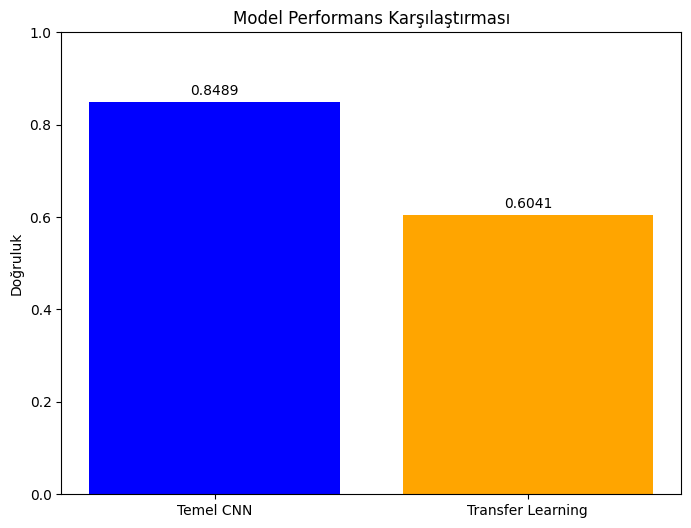

AttributeError: The layer sequential_5 has never been called and thus has no defined input.

In [ ]:
# Model performanslarını karşılaştıralım
models = ['Temel CNN', 'Transfer Learning']
accuracies = [test_accuracy, test_accuracy_transfer]

plt.figure(figsize=(8, 6))
bars = plt.bar(models, accuracies, color=['blue', 'orange'])
plt.title('Model Performans Karşılaştırması')
plt.ylabel('Doğruluk')
plt.ylim(0, 1)

# Çubukların üzerine doğruluk değerlerini yazalım
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{accuracy:.4f}', ha='center', va='bottom')

plt.show()

# Öznitelik haritalarını görselleştirelim
# Modelin girişini tanımlayalım
dummy_input = tf.random.uniform((1, 32, 32, 3))
# Modeli dummy giriş ile çağırarak katmanların giriş/çıkışlarını tanımlayalım
cnn_model(dummy_input)

# İlk evrişim katmanının çıktılarını görselleştirme
layer_outputs = [layer.output for layer in cnn_model.layers[:8]]
activation_model = keras.models.Model(inputs=cnn_model.input, outputs=layer_outputs)

# Rastgele bir görüntü seçelim
img = X_test[10:11]
activations = activation_model.predict(img)

# İlk 6 filtreyi görselleştirelim
layer_names = [layer.name for layer in cnn_model.layers[:8]]

for layer_name, layer_activation in zip(layer_names, activations):
    if 'conv' not in layer_name:
        continue

    n_filters = layer_activation.shape[-1]
    n_cols = 8
    n_rows = n_filters // n_cols

    plt.figure(figsize=(n_cols, n_rows))
    plt.suptitle(layer_name)

    for i in range(min(n_filters, 16)):  # İlk 16 filtreyi göster
        plt.subplot(n_rows, n_cols, i+1)
        plt.imshow(layer_activation[0, :, :, i], cmap='viridis')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

### **8. Model İyileştirme Teknikleri**


Adam optimizer ile eğitim...
Adam Test Doğruluğu: 0.8319

RMSprop optimizer ile eğitim...
RMSprop Test Doğruluğu: 0.7967

SGD optimizer ile eğitim...
SGD Test Doğruluğu: 0.8052


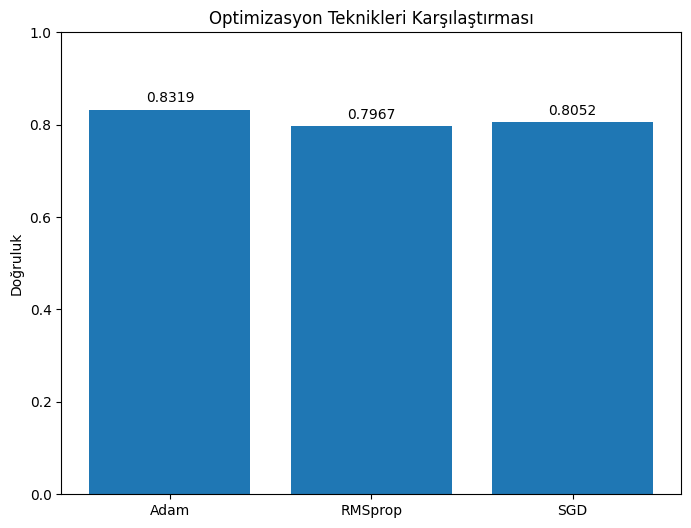

In [ ]:
# Farklı optimizasyon tekniklerini deneyelim
optimizers = {
    'Adam': keras.optimizers.Adam(learning_rate=0.001),
    'RMSprop': keras.optimizers.RMSprop(learning_rate=0.001),
    'SGD': keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
}

results = {}

for opt_name, optimizer in optimizers.items():
    print(f"\n{opt_name} optimizer ile eğitim...")

    model = create_cnn_model()
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(X_train, y_train_categorical,
                       epochs=10,
                       validation_data=(X_test, y_test_categorical),
                       verbose=0)

    test_loss, test_acc = model.evaluate(X_test, y_test_categorical, verbose=0)
    results[opt_name] = test_acc
    print(f"{opt_name} Test Doğruluğu: {test_acc:.4f}")

# Optimizasyon tekniklerini karşılaştıralım
plt.figure(figsize=(8, 6))
bars = plt.bar(results.keys(), results.values())
plt.title('Optimizasyon Teknikleri Karşılaştırması')
plt.ylabel('Doğruluk')
plt.ylim(0, 1)

for bar, accuracy in zip(bars, results.values()):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{accuracy:.4f}', ha='center', va='bottom')

plt.show()

### **9. Sonuçlar ve Değerlendirme**


In [ ]:
print("=" * 50)
print("CIFAR-10 PROJE SONUÇLARI")
print("=" * 50)
print(f"Temel CNN Model Doğruluğu: {test_accuracy:.4f}")
print(f"Transfer Learning Model Doğruluğu: {test_accuracy_transfer:.4f}")
print(f"En iyi optimizer: {max(results, key=results.get)} ({max(results.values()):.4f})")
print("=" * 50)

CIFAR-10 PROJE SONUÇLARI
Temel CNN Model Doğruluğu: 0.8489
Transfer Learning Model Doğruluğu: 0.6041
En iyi optimizer: Adam (0.8319)
